# カスタムクラスを使ってみよう

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchviz import make_dot
import japanize_matplotlib
import torch.optim as optim
import pandas as pd
from torchinfo import summary

# 以下可視性のために定義。
import inspect
from IPython.display import display
# 引数の変数名を出力する変数。ただし仕様上、関数を呼び出した場所と同スコープの変数なら1。その一個上なら2，さらにひとつ上なら3にしなければならない。
def print_var_name(var,n=1):
    """
    受け取った変数の変数名を出力する関数
    """
    # 現在のフレームを取得する
    current_frame = inspect.currentframe()
    # 現在のフレームのn回外側のフレームを取得する
    outer_frame = current_frame
    for _ in range(n):
        outer_frame =outer_frame.f_back
    # 外側のフレームのローカル変数を取得する。2次元タプル?がずらっと配列で並んでいる。
    locals_dict = outer_frame.f_locals
    # 変数名を取得する
    var_name = [k for k, v in locals_dict.items() if v is var]
    if not var_name:
        print("変数が見つかりませんでした。")
    else:
        # 変数名を出力する
        print("変数名 : ",var_name[0])

def dataframe_converter(func):
    def wrapper(*args, **kwargs):
        for arg in args:
            # 引数がNumPy配列の場合はPandasデータフレームに変換する
            print_var_name(arg,2)
            if isinstance(arg, np.ndarray):
                df = pd.DataFrame(arg)
                # デコレータで修飾された関数にデータフレームを渡す
                func(df)
            else:
                # デコレータで修飾された関数にそのままのオブジェクトを渡す
                func(arg)
    return wrapper

@dataframe_converter
def display_custom(obj):
    # 引数のオブジェクトを表示する
    display(obj)

## 1入力1出力線形関数

In [2]:
# 乱数のシードを123に設定する
torch.manual_seed(123)

# 入力サイズ1、出力サイズ1の線形層を定義する
l1=nn.Linear(1,1)

# l1の情報を表示する
print(l1)

# l1のパラメータを1つずつ表示する
for param in l1.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状

Linear(in_features=1, out_features=1, bias=True)
name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [3]:
# l1の重みとバイアスを定数で初期化する
nn.init.constant_(l1.weight,2.0)
nn.init.constant_(l1.bias,1.0)

# l1の重みとバイアスの値を表示する
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [4]:
# -2から2までの値を1刻みで生成する
x_np = np.arange(-2,2.1,1)

# numpy配列をPyTorchのテンソルに変換する
x=torch.tensor(x_np).float()

# テンソルの形状を(5,1)に変更する
x=x.view(-1,1)

# テンソルの形状と値を表示する
print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


<details>
<summary>(5,1)に変更した理由</summary>
(1,5)だと5次元のデータが1つある。になってしまう。しかし、今欲しいのは1次元(1入力)のデータが5つあるという状態である。よって(5,1)に変更している。
</details>

In [5]:
# l1にxを入力して、出力yを計算する
y=l1(x)

# yの形状と値を表示する
print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


## 2入力1出力線形関数

In [6]:
# 入力サイズ2、出力サイズ1の線形層を定義する
l2=nn.Linear(2,1)

# l2の重みとバイアスを定数で初期化する
nn.init.constant_(l2.weight,1.0)
nn.init.constant_(l2.bias,2.0)

# l2のパラメータを1つずつ表示する
for param in l2.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状

name:  weight
tensor:  Parameter containing:
tensor([[1., 1.]], requires_grad=True)
shape:  torch.Size([1, 2])
name:  bias
tensor:  Parameter containing:
tensor([2.], requires_grad=True)
shape:  torch.Size([1])


In [7]:
# -2から2までの値を1刻みで生成する
x2_np = np.array([[0,0],[0,1],[1,0],[1,1]])

# numpy配列をPyTorchのテンソルに変換する
x2=torch.tensor(x2_np).float()

# テンソルの形状を(4,2)に変更する。(今回はいらないが)
x=x.view(-1,1)

# テンソルの形状と値を表示する
print(x2.shape)
print(l2.weight.shape)
print(x2)

torch.Size([4, 2])
torch.Size([1, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [9]:
# l2にx2を入力して、出力y2を計算する
y2=l2(x2)

# y2の形状と値を表示する
print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


## 2入力3出力

In [8]:
l3=nn.Linear(2,3)
# l3の重みとバイアスを定数で初期化する
nn.init.constant_(l3.weight[0,:],1.0)
nn.init.constant_(l3.weight[1,:],2.0)
nn.init.constant_(l3.weight[2,:],3.0)
nn.init.constant_(l3.bias,2.0)

# l3のパラメータを1つずつ表示する
for param in l3.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状


name:  weight
tensor:  Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
shape:  torch.Size([3, 2])
name:  bias
tensor:  Parameter containing:
tensor([2., 2., 2.], requires_grad=True)
shape:  torch.Size([3])


In [10]:
# 2入力なのでデータは前のと同じものを使う。
y3=l3(x2)

# y3の形状と値を表示する
print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


<details>
<summary>上に表示したようにwxではなくxw担っている理由</summary>
l2.wightでみると、数学では$wx$のかたちが多いためか転地されているが、機械学習の流儀で、入力データは左からかける。よって以下のような見方になる。
$$
\begin{bmatrix}
y_1 & y_2 & y_3
\end{bmatrix}
=
\begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22}& w_{32}\\
\end{bmatrix}
+
\begin{bmatrix}
b_1 & b_2 & b_3
\end{bmatrix}
$$
となっておりこれを
$$
y=xw+b
$$
と表している。
    
データ数がたくさんある場合(先程の例はデータ数1)は、例えば今回は4つのデータを用意したので4つにすると
$$
\begin{bmatrix}
y1_1 & y1_2 & y1_3　\\
y2_1 & y2_2 & y2_3　\\
y3_1 & y3_2 & y3_3　\\
y4_1 & y4_2 & y4_3　\\
\end{bmatrix}
=
\begin{bmatrix}
x1_1 & x1_2 \\
x2_1 & x2_2 \\
x3_1 & x3_2 \\
x4_1 & x4_2 \\
\end{bmatrix}
\begin{bmatrix}
w_{11} & w_{21} & w_{31}\\
w_{12} & w_{22}& w_{32}\\
\end{bmatrix}
+
\begin{bmatrix}
b_1 & b_2 & b_3
\end{bmatrix}
$$
</details>

## カスタムクラスの定義

In [11]:
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__()  # 親クラスのコンストラクタを呼び出す
        self.l1=nn.Linear(n_input,n_output)  # 入力と出力の次元を指定して、線形変換を行うレイヤーを定義
        
    def forward(self,x):
        x1=self.l1(x)  # 入力xをレイヤーl1で変換する
        return x1  # 変換された結果を返す

In [12]:
n_input=2
n_output=3
net = Net(n_input,n_output)
for param in net.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状


name:  l1.weight
tensor:  Parameter containing:
tensor([[-0.2596, -0.1390],
        [-0.5394,  0.4630],
        [-0.1668,  0.2270]], requires_grad=True)
shape:  torch.Size([3, 2])
name:  l1.bias
tensor:  Parameter containing:
tensor([0.5000, 0.1317, 0.1934], requires_grad=True)
shape:  torch.Size([3])


## データ準備

In [13]:
# データのURLを指定して、csvファイルを読み込む
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None) #空白(\s)を区切り文字、最初の22行をスキップ、ヘッダーはない(23行目からデータ)

# データを前処理する
#raw_df.valuesでデータフレームをナムパイに変換。その後[::2,:]よりステップ幅2、つまり偶数列を抽出
#[1::2,:2]の方は、奇数列の抽出
# x_orgは偶数列と奇数列の結合 → 元データのcsvの不備で何故か14項目のうち11項目で1行、3項目で1行となってしまっているので直している。
x_org=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:3]]) 

# 出力して何をしてるか確認
display_custom(raw_df,raw_df.values[::2,:],raw_df.values[1::2,:3],x_org)


変数名 :  raw_df


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


変数が見つかりませんでした。


,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0


変数が見つかりませんでした。


,0,1,2
0,396.90,4.98,24.0
1,396.90,9.14,21.6
2,392.83,4.03,34.7
3,394.63,2.94,33.4
4,396.90,5.33,36.2
...,...,...,...
501,391.99,9.67,22.4
502,396.90,9.08,20.6
503,396.90,5.64,23.9
504,393.45,6.48,22.0


変数名 :  x_org


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [14]:
feature__names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']

In [15]:
# Numpy配列をDataFrameに変換し、列名を設定する
x_org = pd.DataFrame(x_org)
feature__names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
x_org.columns = feature__names

# 'RM'列だけを抽出し、Numpy配列に変換する
x = x_org[["RM"]].values

# 抽出した列の先頭5行を表示する
print("抽出した'RM'列の先頭5行")
print(x[:5,:])

# 正解データを抽出し、先頭5行を表示する
yt = x_org[["MEDV"]].values
print("抽出した正解データの先頭5行")
print(yt[:5])

# DataFrameをNumpy配列に変換する
x_org = x_org.values

抽出した'RM'列の先頭5行
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
抽出した正解データの先頭5行
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


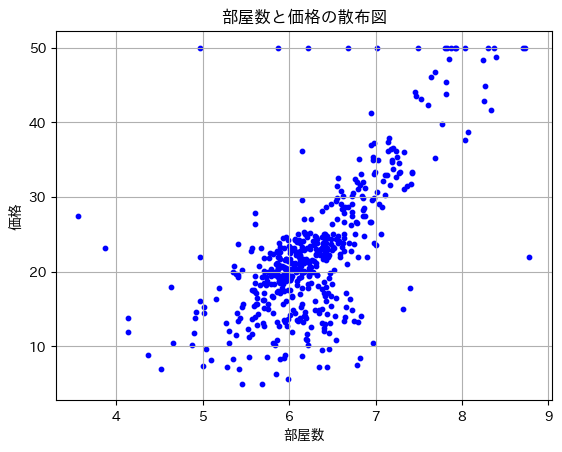

In [16]:
plt.scatter(x, yt, s=10,c='b')
plt.grid(True)
# ラベルを設定する
plt.xlabel("部屋数")
plt.ylabel("価格")
plt.title("部屋数と価格の散布図")
# グラフを表示する
plt.show()

## 単回帰

In [17]:
inputs = x
n_input = x.shape[1]
n_output=1


In [18]:
class Net(nn.Module):
    def __init__(self,n_input,n_output):
        super().__init__()  # 親クラスのコンストラクタを呼び出す
        self.l1=nn.Linear(n_input,n_output)  # 入力と出力の次元を指定して、線形変換を行うレイヤーを定義
        nn.init.constant_(self.l1.weight,1.0)
        nn.init.constant_(self.l1.bias,1.0)
    def forward(self,x):
        x1=self.l1(x)  # 入力xをレイヤーl1で変換する
        return x1  # 変換された結果を返す

In [19]:
net = Net(n_input,n_output)
for param in net.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状

name:  l1.weight
tensor:  Parameter containing:
tensor([[1.]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  l1.bias
tensor:  Parameter containing:
tensor([1.], requires_grad=True)
shape:  torch.Size([1])


In [20]:
summary(net,(1,))

/opt/anaconda3/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/opt/anaconda3/lib/python3.9/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [21]:
# 入力データをテンソルに変換する
inputs = torch.tensor(x).float()

# ラベルをテンソルに変換する
labels = torch.tensor(yt).float()

# 入力データの形状を出力する
print(inputs.shape)

# ラベルの形状を出力する
print(labels.shape)

torch.Size([506, 1])
torch.Size([506, 1])


In [22]:
# 学習率を設定する
lr = 0.01

# 入力サイズと出力サイズを指定して、ネットワークのインスタンスを作成する
net = Net(n_input, n_output)

# 損失関数を平均二乗誤差として定義する
criterion = nn.MSELoss()

# 確率的勾配降下法 (SGD) をオプティマイザとして定義する
optimizer = optim.SGD(net.parameters(), lr=lr)

# 学習のエポック数を指定する
num_epochs = 50000

# 学習の履歴を格納するための配列を初期化する
history = np.zeros((0, 2))

# エポック数だけ学習を繰り返す
for epoch in range(num_epochs):
    
    # 勾配をゼロにリセットする
    optimizer.zero_grad()
    
    # 入力データをネットワークに入力して、出力を取得する
    outputs = net(inputs)
    
    # 出力とラベルを比較して、損失を計算する
    loss = criterion(outputs, labels) / 2.0
    
    # 誤差逆伝播を行い、パラメータを更新する
    loss.backward()
    optimizer.step()
    
    # 100エポックごとに、損失を表示する
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))

損失初期値: 154.22493
損失最終値: 21.80033


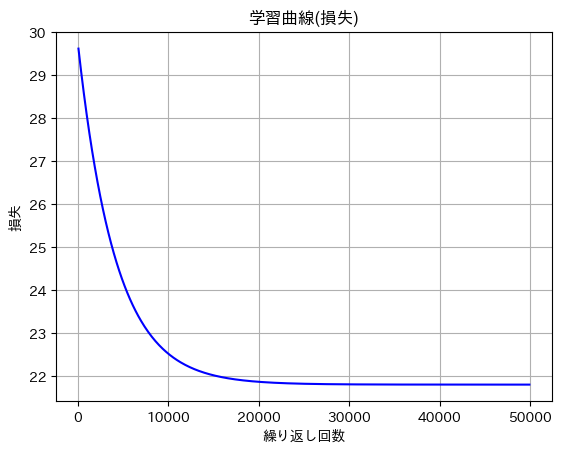

In [23]:
print(f'損失初期値: {history[0,1]:.5f}')
print(f'損失最終値: {history[-1,1]:.5f}')
plt.plot(history[1:,0],history[1:,1],'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid(True)
plt.show()

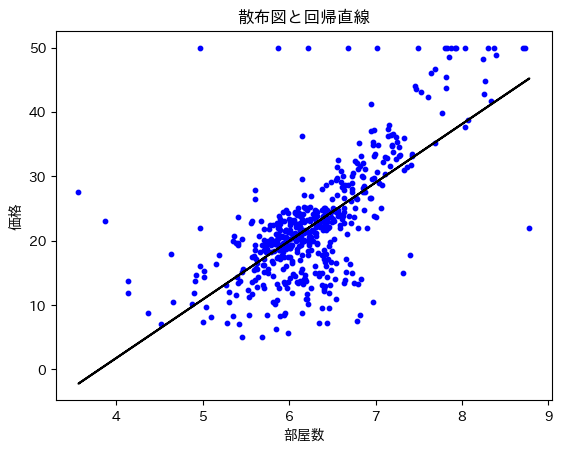

In [24]:
plt.scatter(x,yt,s=10,c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(inputs.data,outputs.data,c='k')
plt.title("散布図と回帰直線")
plt.show()

## 重回帰

In [25]:
x_org = pd.DataFrame(x_org)
feature__names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
x_org.columns = feature__names

# 'RM'列だけを抽出し、Numpy配列に変換する
x2 = x_org[["RM","LSTAT"]].values

# 抽出した列の先頭5行を表示する
print("抽出した'RM','LSTAT'列の先頭5行")
print(x[:5,:])

# 正解データの先頭5行を表示する
print("正解データの先頭5行")
print(yt[:5])

# DataFrameをNumpy配列に変換する
x_org = x_org.values

抽出した'RM','LSTAT'列の先頭5行
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データの先頭5行
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


In [26]:
# 入力次元数=2
n_input = x2.shape[1]
print(n_input)

# 出力次元数=1
n_output = 1

# モデルのインスタンスを作成する
net = Net(n_input, n_output)

2


In [27]:
for param in net.named_parameters():
    print('name: ',param[0]) # パラメータの名前
    print('tensor: ',param[1]) # パラメータの値
    print('shape: ',param[1].shape) # パラメータの形状

name:  l1.weight
tensor:  Parameter containing:
tensor([[1., 1.]], requires_grad=True)
shape:  torch.Size([1, 2])
name:  l1.bias
tensor:  Parameter containing:
tensor([1.], requires_grad=True)
shape:  torch.Size([1])


In [29]:
summary(net,(2,))

/opt/anaconda3/lib/python3.9/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/opt/anaconda3/lib/python3.9/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [30]:
# x2をテンソルに変換する
inputs = torch.tensor(x2).float()

In [31]:
# 損失関数を平均二乗誤差として定義する
criterion = nn.MSELoss()

# 確率的勾配降下法 (SGD) をオプティマイザとして定義する
optimizer = optim.SGD(net.parameters(), lr=lr)

# 学習の履歴を格納するための配列を初期化する
history = np.zeros((0, 2))

# エポック数だけ学習を繰り返す
num_epochs = 50000

for epoch in range(num_epochs):
    
    # 勾配をゼロにリセットする
    optimizer.zero_grad()
    
    # 入力データをネットワークに入力して、出力を取得する
    outputs = net(inputs)
    
    # 出力とラベルを比較して、損失を計算する
    loss = criterion(outputs, labels) / 2.0
    
    # 誤差逆伝播を行い、パラメータを更新する
    loss.backward()
    optimizer.step()
    
    # 100エポックごとに、損失を表示する
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'epoch: {epoch}, loss: {loss.item():.5f}')

epoch: 0, loss: 112.06398
epoch: 100, loss: 3753844024966122352784370040832.00000
epoch: 200, loss: inf
epoch: 300, loss: nan
epoch: 400, loss: nan
epoch: 500, loss: nan
epoch: 600, loss: nan
epoch: 700, loss: nan
epoch: 800, loss: nan
epoch: 900, loss: nan
epoch: 1000, loss: nan
epoch: 1100, loss: nan
epoch: 1200, loss: nan
epoch: 1300, loss: nan
epoch: 1400, loss: nan
epoch: 1500, loss: nan
epoch: 1600, loss: nan
epoch: 1700, loss: nan
epoch: 1800, loss: nan
epoch: 1900, loss: nan
epoch: 2000, loss: nan
epoch: 2100, loss: nan
epoch: 2200, loss: nan
epoch: 2300, loss: nan
epoch: 2400, loss: nan
epoch: 2500, loss: nan
epoch: 2600, loss: nan
epoch: 2700, loss: nan
epoch: 2800, loss: nan
epoch: 2900, loss: nan
epoch: 3000, loss: nan
epoch: 3100, loss: nan
epoch: 3200, loss: nan
epoch: 3300, loss: nan
epoch: 3400, loss: nan
epoch: 3500, loss: nan
epoch: 3600, loss: nan
epoch: 3700, loss: nan
epoch: 3800, loss: nan
epoch: 3900, loss: nan
epoch: 4000, loss: nan
epoch: 4100, loss: nan
epoch:

* 損失がinf→nanとなっているのでこれは失敗している。
* 学習率を変えてもう一回やってみよう。

In [32]:
# 学習率の変更
lr = 0.001

# モデルのインスタンスを作成する
net = Net(n_input, n_output)

# 損失関数を平均二乗誤差として定義する
criterion = nn.MSELoss()

# 確率的勾配降下法 (SGD) をオプティマイザとして定義する
optimizer = optim.SGD(net.parameters(), lr=lr)

# 学習の履歴を格納するための配列を初期化する
history = np.zeros((0, 2))

# エポック数だけ学習を繰り返す

for epoch in range(num_epochs):
        
        # 勾配をゼロにリセットする
        optimizer.zero_grad()
        
        # 入力データをネットワークに入力して、出力を取得する
        outputs = net(inputs)
        
        # 出力とラベルを比較して、損失を計算する
        loss = criterion(outputs, labels) / 2.0
        
        # 誤差逆伝播を行い、パラメータを更新する
        loss.backward()
        optimizer.step()
        
        # 100エポックごとに、損失を表示する
        if epoch % 100 == 0:
            history = np.vstack((history, np.array([epoch, loss.item()])))
            print(f'epoch: {epoch}, loss: {loss.item():.5f}')

epoch: 0, loss: 112.06398
epoch: 100, loss: 25.35892
epoch: 200, loss: 16.39105
epoch: 300, loss: 15.40301
epoch: 400, loss: 15.29414
epoch: 500, loss: 15.28211
epoch: 600, loss: 15.28076
epoch: 700, loss: 15.28059
epoch: 800, loss: 15.28054
epoch: 900, loss: 15.28051
epoch: 1000, loss: 15.28048
epoch: 1100, loss: 15.28046
epoch: 1200, loss: 15.28043
epoch: 1300, loss: 15.28040
epoch: 1400, loss: 15.28037
epoch: 1500, loss: 15.28034
epoch: 1600, loss: 15.28032
epoch: 1700, loss: 15.28028
epoch: 1800, loss: 15.28026
epoch: 1900, loss: 15.28023
epoch: 2000, loss: 15.28020
epoch: 2100, loss: 15.28017
epoch: 2200, loss: 15.28014
epoch: 2300, loss: 15.28012
epoch: 2400, loss: 15.28009
epoch: 2500, loss: 15.28006
epoch: 2600, loss: 15.28003
epoch: 2700, loss: 15.28000
epoch: 2800, loss: 15.27997
epoch: 2900, loss: 15.27995
epoch: 3000, loss: 15.27992
epoch: 3100, loss: 15.27989
epoch: 3200, loss: 15.27986
epoch: 3300, loss: 15.27983
epoch: 3400, loss: 15.27981
epoch: 3500, loss: 15.27978
epo

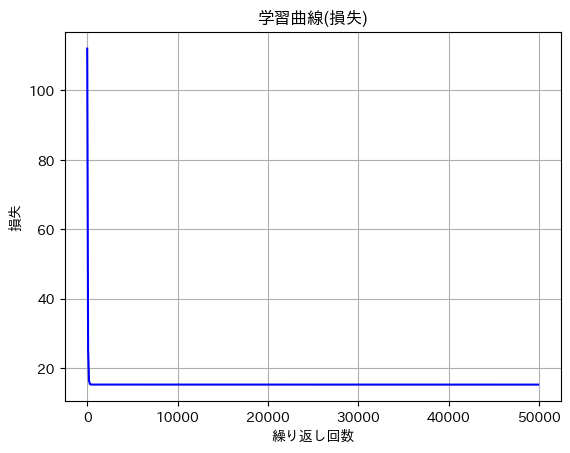

In [33]:
# 学習曲線を表示する
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.grid(True)
plt.show()